# Setup

In [ ]:
import cupy as cp
import numpy as np

if cp.cuda.is_available():
	print("GPU is available")
	print("GPU: ", cp.cuda.runtime.getDeviceProperties(0)['name'])
import os
import tempfile
from IPython.display import HTML, display
import h5py
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5, 4)

import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation

MAKE_ANIMATIONS = True


tempdir = tempfile.TemporaryDirectory()

def make_video_from_solution(
	solution,
	quantities=("order_parameter", "phase"),
	fps=30,
	figsize=(5, 4),
	cmap=None,
	vmin_a=None,
	vmax_a=None,
	cmap_b=None,
	):
	"""Generates an HTML5 video from a tdgl.Solution."""
	with tdgl.non_gui_backend():
		with h5py.File(solution.path, "r") as h5file:
			print(cmap_b)
			anim = create_animation(
				h5file,
				quantities=quantities,
				fps=fps,
				figure_kwargs=dict(figsize=figsize, dpi=100),
				vmin=vmin_a,
				vmax=vmax_a,
				cmap=cmap_b,
			)
			video = anim.to_html5_video()
		return HTML(video)
	

	

# Physical properties

In [ ]:
length_units = "um"
# Material parameters
xi = 0.1
london_lambda = 2
d = 0.1
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

width = 0.8
height = 0.8

film = tdgl.Polygon('film', points=box(width, height)).resample(401).buffer(0)


source1 = tdgl.Polygon('source1', points=box(0.05,0.1)).translate(-width/2, 0 ).buffer(0)
drain1 = tdgl.Polygon('drain1', points=box(0.05,0.1)).translate(width/2, 0 ).buffer(0)
source2 = tdgl.Polygon('source2', points=box(0.1,0.05)).translate(0,-height/2 ).buffer(0)
drain2 = tdgl.Polygon('drain2', points=box(0.1,0.05)).translate(0,height/2).buffer(0)


device=tdgl.Device("2currents",
				   layer=layer 
				   ,film=film
				   ,terminals= [source1,drain1,source2,drain2]
				   ,length_units=length_units
				   ,probe_points=[((0, 0),(width*(0.4),height*(0.4)))]
				   )

fig,ax=device.draw()

In [ ]:
device.make_mesh(max_edge_length=xi / 4, smooth=100)
device.mesh_stats(print_b=True)
fig, ax = device.plot(mesh=True, legend=False)

In [ ]:


import tdgl.sources


options = tdgl.SolverOptions(
    solve_time=200,
    # output_file=os.path.join(tempdir.name, "weak-link-zero-current.h5"),
    field_units = "mT",
    current_units="uA",

)
applied_vector_potential=tdgl.sources.constant.ConstantField(30,field_units=options.field_units,length_units=device.length_units)

currents=np.linspace(0.0, 20,2000 )
voltages=[]
times=[]
solutions=[]
for ii in range(currents.size):

	zero_current_solution = tdgl.solve(
		device=device,
		options=options,
		applied_vector_potential=applied_vector_potential,
		terminal_currents=dict(source1=currents[ii], drain1=-currents[ii],source2=currents[ii],drain2=-currents[ii])
	)
	# fig, axes = zero_current_solution.plot_order_parameter(figsize=(10, 4))
	# voltage=
	voltages.append(zero_current_solution.dynamics.voltage())
	solutions.append(zero_current_solution)
	
	times.append(zero_current_solution.dynamics.time)
	print(ii)


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.90tau/s ]


0


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


1


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


2


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.09tau/s ]


3


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.24tau/s ]


4


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.01tau/s ]


5


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.86tau/s ]


6


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.22tau/s ]


7


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.06tau/s ]


8


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


9


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


10


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.97tau/s ]


11


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


12


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.06tau/s ]


13


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.03tau/s ]


14


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


15


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.85tau/s ]


16


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.89tau/s ]


17


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.38tau/s ]


18


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.33tau/s ]


19


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


20


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.40tau/s ]


21


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


22


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


23


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.36tau/s ]


24


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.38tau/s ]


25


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.45tau/s ]


26


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


27


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.95tau/s ]


28


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


29


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


30


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.11tau/s ]


31


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


32


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.31tau/s ]


33


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


34


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.24tau/s ]


35


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.28tau/s ]


36


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.23tau/s ]


37


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.23tau/s ]


38


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.14tau/s ]


39


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


40


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.20tau/s ]


41


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.20tau/s ]


42


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.08tau/s ]


43


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.11tau/s ]


44


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


45


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


46


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


47


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


48


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.84tau/s ]


49


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.41tau/s ]


50


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.82tau/s ]


51


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.84tau/s ]


52


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.26tau/s ]


53


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


54


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.05tau/s ]


55


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.95tau/s ]


56


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


57


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.01tau/s ]


58


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.99tau/s ]


59


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.07tau/s ]


60


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.04tau/s ]


61


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.12tau/s ]


62


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.12tau/s ]


63


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.15tau/s ]


64


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.05tau/s ]


65


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


66


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.20tau/s ]


67


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


68


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


69


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.26tau/s ]


70


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


71


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.41tau/s ]


72


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.45tau/s ]


73


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.45tau/s ]


74


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.45tau/s ]


75


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.49tau/s ]


76


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.39tau/s ]


77


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.48tau/s ]


78


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.42tau/s ]


79


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.39tau/s ]


80


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.36tau/s ]


81


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.42tau/s ]


82


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.33tau/s ]


83


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


84


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.38tau/s ]


85


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.41tau/s ]


86


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


87


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.38tau/s ]


88


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.31tau/s ]


89


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


90


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


91


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.31tau/s ]


92


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.33tau/s ]


93


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.42tau/s ]


94


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.23tau/s ]


95


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


96


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.22tau/s ]


97


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


98


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


99


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


100


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


101


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


102


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


103


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


104


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.31tau/s ]


105


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.31tau/s ]


106


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.24tau/s ]


107


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


108


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


109


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


110


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


111


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.26tau/s ]


112


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


113


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.25tau/s ]


114


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


115


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.24tau/s ]


116


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.22tau/s ]


117


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


118


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.10tau/s ]


119


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


120


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


121


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.06tau/s ]


122


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.04tau/s ]


123


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.06tau/s ]


124


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.00tau/s ]


125


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


126


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  4.00tau/s ]


127


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


128


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


129


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.01tau/s ]


130


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.95tau/s ]


131


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.88tau/s ]


132


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.94tau/s ]


133


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.86tau/s ]


134


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.86tau/s ]


135


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.89tau/s ]


136


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.85tau/s ]


137


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.74tau/s ]


138


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.73tau/s ]


139


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.78tau/s ]


140


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.83tau/s ]


141


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.78tau/s ]


142


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.80tau/s ]


143


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.74tau/s ]


144


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


145


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.75tau/s ]


146


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.77tau/s ]


147


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.71tau/s ]


148


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.73tau/s ]


149


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


150


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.70tau/s ]


151


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


152


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.71tau/s ]


153


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


154


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.66tau/s ]


155


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.63tau/s ]


156


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


157


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.67tau/s ]


158


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


159


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


160


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


161


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.63tau/s ]


162


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.64tau/s ]


163


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


164


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


165


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


166


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


167


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


168


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


169


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


170


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.59tau/s ]


171


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.54tau/s ]


172


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


173


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


174


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


175


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.56tau/s ]


176


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.56tau/s ]


177


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


178


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.56tau/s ]


179


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.57tau/s ]


180


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.54tau/s ]


181


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.54tau/s ]


182


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.33tau/s ]


183


Simulating: 100%|█████████▉| 200/200 [00:57<00:00,  3.46tau/s ]


184


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.41tau/s ]


185


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.41tau/s ]


186


Simulating: 100%|█████████▉| 200/200 [00:57<00:00,  3.47tau/s ]


187


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.43tau/s ]


188


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.51tau/s ]


189


Simulating: 100%|█████████▉| 200/200 [00:57<00:00,  3.47tau/s ]


190


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.44tau/s ]


191


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.38tau/s ]


192


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.38tau/s ]


193


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.39tau/s ]


194


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.40tau/s ]


195


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.35tau/s ]


196


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.38tau/s ]


197


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


198


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.42tau/s ]


199


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.39tau/s ]


200


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.39tau/s ]


201


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.40tau/s ]


202


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.37tau/s ]


203


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.33tau/s ]


204


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.37tau/s ]


205


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.36tau/s ]


206


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.30tau/s ]


207


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.33tau/s ]


208


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.33tau/s ]


209


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.33tau/s ]


210


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.40tau/s ]


211


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.31tau/s ]


212


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.27tau/s ]


213


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


214


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.37tau/s ]


215


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


216


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.39tau/s ]


217


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.28tau/s ]


218


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.34tau/s ]


219


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.34tau/s ]


220


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


221


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.26tau/s ]


222


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.27tau/s ]


223


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.33tau/s ]


224


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


225


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.32tau/s ]


226


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.30tau/s ]


227


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.29tau/s ]


228


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.25tau/s ]


229


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.26tau/s ]


230


Simulating: 100%|█████████▉| 200/200 [01:00<00:00,  3.29tau/s ]


231


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.20tau/s ]


232


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.22tau/s ]


233


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.25tau/s ]


234


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.26tau/s ]


235


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.21tau/s ]


236


Simulating: 100%|█████████▉| 200/200 [01:01<00:00,  3.24tau/s ]


237


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.22tau/s ]


238


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


239


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


240


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.15tau/s ]


241


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.20tau/s ]


242


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.17tau/s ]


243


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.15tau/s ]


244


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.20tau/s ]


245


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.18tau/s ]


246


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.21tau/s ]


247


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.18tau/s ]


248


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


249


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


250


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.20tau/s ]


251


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.13tau/s ]


252


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.16tau/s ]


253


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


254


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.17tau/s ]


255


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.16tau/s ]


256


Simulating: 100%|█████████▉| 200/200 [01:02<00:00,  3.19tau/s ]


257


Simulating: 100%|█████████▉| 200/200 [01:03<00:00,  3.14tau/s ]


258


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.12tau/s ]


259


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.11tau/s ]


260


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.08tau/s ]


261


Simulating: 100%|█████████▉| 200/200 [01:05<00:00,  3.06tau/s ]


262


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.09tau/s ]


263


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.09tau/s ]


264


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.08tau/s ]


265


Simulating: 100%|█████████▉| 200/200 [01:05<00:00,  3.05tau/s ]


266


Simulating: 100%|█████████▉| 200/200 [01:04<00:00,  3.12tau/s ]


267


Simulating: 100%|█████████▉| 200/200 [01:05<00:00,  3.04tau/s ]


268


Simulating: 100%|█████████▉| 200/200 [01:12<00:00,  2.74tau/s ]


269


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.00tau/s ]


270


Simulating: 100%|█████████▉| 200/200 [01:07<00:00,  2.97tau/s ]


271


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  2.99tau/s ]


272


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.02tau/s ]


273


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.02tau/s ]


274


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.02tau/s ]


275


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.00tau/s ]


276


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  3.02tau/s ]


277


Simulating: 100%|█████████▉| 200/200 [01:07<00:00,  2.95tau/s ]


278


Simulating: 100%|█████████▉| 200/200 [01:07<00:00,  2.96tau/s ]


279


Simulating: 100%|█████████▉| 200/200 [01:07<00:00,  2.96tau/s ]


280


Simulating: 100%|█████████▉| 200/200 [01:06<00:00,  2.99tau/s ]


281


Simulating: 100%|█████████▉| 200/200 [01:07<00:00,  2.95tau/s ]


282


Simulating: 100%|█████████▉| 200/200 [01:09<00:00,  2.86tau/s ]


283


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.46tau/s ]


284


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.27tau/s ]


285


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.11tau/s ]


286


Simulating: 100%|█████████▉| 200/200 [01:33<00:00,  2.15tau/s ]


287


Simulating: 100%|█████████▉| 200/200 [01:33<00:00,  2.15tau/s ]


288


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.33tau/s ]


289


Simulating: 100%|█████████▉| 200/200 [01:32<00:00,  2.17tau/s ]


290


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.05tau/s ]


291


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


292


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.03tau/s ]


293


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.08tau/s ]


294


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.04tau/s ]


295


Simulating: 100%|█████████▉| 200/200 [01:39<00:00,  2.01tau/s ]


296


Simulating: 100%|█████████▉| 200/200 [01:40<00:00,  1.99tau/s ]


297


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.05tau/s ]


298


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.10tau/s ]


299


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.11tau/s ]


300


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.06tau/s ]


301


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.06tau/s ]


302


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.44tau/s ]


303


Simulating: 100%|█████████▉| 200/200 [01:18<00:00,  2.53tau/s ]


304


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


305


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.50tau/s ]


306


Simulating: 100%|█████████▉| 200/200 [01:18<00:00,  2.54tau/s ]


307


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.50tau/s ]


308


Simulating: 100%|█████████▉| 200/200 [01:18<00:00,  2.56tau/s ]


309


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.48tau/s ]


310


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.52tau/s ]


311


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.51tau/s ]


312


Simulating: 100%|█████████▉| 200/200 [01:18<00:00,  2.54tau/s ]


313


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.53tau/s ]


314


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.53tau/s ]


315


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.52tau/s ]


316


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.52tau/s ]


317


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.53tau/s ]


318


Simulating: 100%|█████████▉| 200/200 [01:18<00:00,  2.54tau/s ]


319


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.50tau/s ]


320


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.53tau/s ]


321


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


322


Simulating: 100%|█████████▉| 200/200 [01:19<00:00,  2.51tau/s ]


323


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.48tau/s ]


324


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.47tau/s ]


325


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.48tau/s ]


326


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.46tau/s ]


327


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


328


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.48tau/s ]


329


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


330


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


331


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.44tau/s ]


332


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.47tau/s ]


333


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.43tau/s ]


334


Simulating: 100%|█████████▉| 200/200 [01:20<00:00,  2.49tau/s ]


335


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.41tau/s ]


336


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.44tau/s ]


337


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.41tau/s ]


338


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.43tau/s ]


339


Simulating: 100%|█████████▉| 200/200 [01:21<00:00,  2.46tau/s ]


340


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.44tau/s ]


341


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.41tau/s ]


342


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.41tau/s ]


343


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.41tau/s ]


344


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.43tau/s ]


345


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.42tau/s ]


346


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.42tau/s ]


347


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.40tau/s ]


348


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.42tau/s ]


349


Simulating: 100%|█████████▉| 200/200 [01:22<00:00,  2.41tau/s ]


350


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.37tau/s ]


351


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.40tau/s ]


352


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.39tau/s ]


353


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.38tau/s ]


354


Simulating: 100%|█████████▉| 200/200 [01:23<00:00,  2.38tau/s ]


355


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.37tau/s ]


356


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.35tau/s ]


357


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.34tau/s ]


358


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.36tau/s ]


359


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.35tau/s ]


360


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.38tau/s ]


361


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.34tau/s ]


362


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.33tau/s ]


363


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.33tau/s ]


364


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.35tau/s ]


365


Simulating: 100%|█████████▉| 200/200 [01:24<00:00,  2.36tau/s ]


366


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.34tau/s ]


367


Simulating: 100%|█████████▉| 200/200 [01:25<00:00,  2.33tau/s ]


368


Simulating: 100%|█████████▉| 200/200 [01:26<00:00,  2.31tau/s ]


369


Simulating: 100%|█████████▉| 200/200 [01:26<00:00,  2.30tau/s ]


370


Simulating: 100%|█████████▉| 200/200 [01:26<00:00,  2.32tau/s ]


371


Simulating: 100%|█████████▉| 200/200 [01:27<00:00,  2.29tau/s ]


372


Simulating: 100%|█████████▉| 200/200 [01:26<00:00,  2.31tau/s ]


373


Simulating: 100%|█████████▉| 200/200 [01:26<00:00,  2.31tau/s ]


374


Simulating: 100%|█████████▉| 200/200 [01:27<00:00,  2.28tau/s ]


375


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.26tau/s ]


376


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.26tau/s ]


377


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.25tau/s ]


378


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.24tau/s ]


379


Simulating: 100%|█████████▉| 200/200 [01:27<00:00,  2.28tau/s ]


380


Simulating: 100%|█████████▉| 200/200 [01:27<00:00,  2.28tau/s ]


381


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.27tau/s ]


382


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.27tau/s ]


383


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.25tau/s ]


384


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.25tau/s ]


385


Simulating: 100%|█████████▉| 200/200 [01:28<00:00,  2.25tau/s ]


386


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.24tau/s ]


387


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.23tau/s ]


388


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.23tau/s ]


389


Simulating: 100%|█████████▉| 200/200 [01:30<00:00,  2.21tau/s ]


390


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.22tau/s ]


391


Simulating: 100%|█████████▉| 200/200 [01:31<00:00,  2.20tau/s ]


392


Simulating: 100%|█████████▉| 200/200 [01:29<00:00,  2.23tau/s ]


393


Simulating: 100%|█████████▉| 200/200 [01:31<00:00,  2.19tau/s ]


394


Simulating: 100%|█████████▉| 200/200 [01:31<00:00,  2.19tau/s ]


395


Simulating: 100%|█████████▉| 200/200 [01:32<00:00,  2.17tau/s ]


396


Simulating: 100%|█████████▉| 200/200 [01:32<00:00,  2.16tau/s ]


397


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.12tau/s ]


398


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.12tau/s ]


399


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.11tau/s ]


400


Simulating: 100%|█████████▉| 200/200 [01:33<00:00,  2.13tau/s ]


401


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.11tau/s ]


402


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


403


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.09tau/s ]


404


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


405


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.10tau/s ]


406


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.10tau/s ]


407


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.10tau/s ]


408


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.09tau/s ]


409


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.06tau/s ]


410


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.04tau/s ]


411


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


412


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.12tau/s ]


413


Simulating: 100%|█████████▉| 200/200 [01:34<00:00,  2.11tau/s ]


414


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


415


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.03tau/s ]


416


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.04tau/s ]


417


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.04tau/s ]


418


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.05tau/s ]


419


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.04tau/s ]


420


Simulating: 100%|█████████▉| 200/200 [01:35<00:00,  2.08tau/s ]


421


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.08tau/s ]


422


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.06tau/s ]


423


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.05tau/s ]


424


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.07tau/s ]


425


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.05tau/s ]


426


Simulating: 100%|█████████▉| 200/200 [01:36<00:00,  2.06tau/s ]


427


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.06tau/s ]


428


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


429


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


430


Simulating: 100%|█████████▉| 200/200 [01:37<00:00,  2.04tau/s ]


431


Simulating: 100%|█████████▉| 200/200 [01:38<00:00,  2.03tau/s ]


432


Simulating: 100%|█████████▉| 200/200 [01:39<00:00,  2.01tau/s ]


433


Simulating: 100%|█████████▉| 200/200 [01:40<00:00,  1.99tau/s ]


434


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.98tau/s ]


435


Simulating: 100%|█████████▉| 200/200 [01:40<00:00,  1.99tau/s ]


436


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


437


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.96tau/s ]


438


Simulating: 100%|█████████▉| 200/200 [01:40<00:00,  1.98tau/s ]


439


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


440


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


441


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.96tau/s ]


442


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.98tau/s ]


443


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.96tau/s ]


444


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.97tau/s ]


445


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.96tau/s ]


446


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.94tau/s ]


447


Simulating: 100%|█████████▉| 200/200 [01:43<00:00,  1.93tau/s ]


448


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.94tau/s ]


449


Simulating: 100%|█████████▉| 200/200 [01:42<00:00,  1.96tau/s ]


450


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.96tau/s ]


451


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.96tau/s ]


452


Simulating: 100%|█████████▉| 200/200 [01:41<00:00,  1.96tau/s ]


453


Simulating: 100%|█████████▉| 200/200 [01:43<00:00,  1.92tau/s ]


454


Simulating: 100%|█████████▉| 200/200 [01:44<00:00,  1.92tau/s ]


455


Simulating: 100%|█████████▉| 200/200 [01:43<00:00,  1.93tau/s ]


456


Simulating: 100%|█████████▉| 200/200 [01:44<00:00,  1.92tau/s ]


457


Simulating: 100%|█████████▉| 200/200 [01:45<00:00,  1.89tau/s ]


458


Simulating: 100%|█████████▉| 200/200 [01:46<00:00,  1.88tau/s ]


459


Simulating: 100%|█████████▉| 200/200 [01:46<00:00,  1.87tau/s ]


460


Simulating: 100%|█████████▉| 200/200 [01:46<00:00,  1.88tau/s ]


461


Simulating: 100%|█████████▉| 200/200 [01:47<00:00,  1.86tau/s ]


462


Simulating: 100%|█████████▉| 200/200 [01:48<00:00,  1.85tau/s ]


463


Simulating: 100%|█████████▉| 200/200 [01:48<00:00,  1.83tau/s ]


464


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.82tau/s ]


465


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.82tau/s ]


466


Simulating: 100%|█████████▉| 200/200 [01:49<00:00,  1.82tau/s ]


467


Simulating: 100%|█████████▉| 200/200 [01:51<00:00,  1.79tau/s ]


468


Simulating: 100%|█████████▉| 200/200 [01:52<00:00,  1.78tau/s ]


469


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.76tau/s ]


470


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.77tau/s ]


471


Simulating: 100%|█████████▉| 200/200 [01:55<00:00,  1.73tau/s ]


472


Simulating: 100%|█████████▉| 200/200 [01:54<00:00,  1.75tau/s ]


473


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.72tau/s ]


474


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.72tau/s ]


475


Simulating: 100%|█████████▉| 200/200 [01:55<00:00,  1.73tau/s ]


476


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.72tau/s ]


477


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.71tau/s ]


478


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.77tau/s ]


479


Simulating: 100%|█████████▉| 200/200 [01:46<00:00,  1.88tau/s ]


480


Simulating: 100%|█████████▉| 200/200 [01:46<00:00,  1.89tau/s ]


481


Simulating: 100%|█████████▉| 200/200 [01:47<00:00,  1.86tau/s ]


482


Simulating: 100%|█████████▉| 200/200 [01:47<00:00,  1.86tau/s ]


483


Simulating: 100%|█████████▉| 200/200 [01:47<00:00,  1.86tau/s ]


484


Simulating: 100%|█████████▉| 200/200 [01:47<00:00,  1.86tau/s ]


485


Simulating: 100%|█████████▉| 200/200 [01:49<00:00,  1.83tau/s ]


486


Simulating: 100%|█████████▉| 200/200 [01:48<00:00,  1.84tau/s ]


487


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.81tau/s ]


488


Simulating: 100%|█████████▉| 200/200 [01:49<00:00,  1.83tau/s ]


489


Simulating: 100%|█████████▉| 200/200 [01:51<00:00,  1.79tau/s ]


490


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.81tau/s ]


491


Simulating: 100%|█████████▉| 200/200 [01:51<00:00,  1.80tau/s ]


492


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.81tau/s ]


493


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.81tau/s ]


494


Simulating: 100%|█████████▉| 200/200 [01:51<00:00,  1.79tau/s ]


495


Simulating: 100%|█████████▉| 200/200 [01:50<00:00,  1.81tau/s ]


496


Simulating: 100%|█████████▉| 200/200 [01:52<00:00,  1.78tau/s ]


497


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.76tau/s ]


498


Simulating: 100%|█████████▉| 200/200 [01:52<00:00,  1.78tau/s ]


499


Simulating: 100%|█████████▉| 200/200 [01:54<00:00,  1.75tau/s ]


500


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.77tau/s ]


501


Simulating: 100%|█████████▉| 200/200 [01:55<00:00,  1.74tau/s ]


502


Simulating: 100%|█████████▉| 200/200 [01:55<00:00,  1.74tau/s ]


503


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.76tau/s ]


504


Simulating: 100%|█████████▉| 200/200 [01:53<00:00,  1.76tau/s ]


505


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.71tau/s ]


506


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.72tau/s ]


507


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


508


Simulating: 100%|█████████▉| 200/200 [02:08<00:00,  1.55tau/s ]


509


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


510


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.71tau/s ]


511


Simulating: 100%|█████████▉| 200/200 [01:58<00:00,  1.69tau/s ]


512


Simulating: 100%|█████████▉| 200/200 [02:00<00:00,  1.67tau/s ]


513


Simulating: 100%|█████████▉| 200/200 [01:58<00:00,  1.69tau/s ]


514


Simulating: 100%|█████████▉| 200/200 [01:56<00:00,  1.72tau/s ]


515


Simulating: 100%|█████████▉| 200/200 [01:57<00:00,  1.69tau/s ]


516


Simulating: 100%|█████████▉| 200/200 [01:58<00:00,  1.68tau/s ]


517


Simulating: 100%|█████████▉| 200/200 [02:00<00:00,  1.67tau/s ]


518


Simulating: 100%|█████████▉| 200/200 [01:59<00:00,  1.67tau/s ]


519


Simulating: 100%|█████████▉| 200/200 [02:01<00:00,  1.65tau/s ]


520


Simulating: 100%|█████████▉| 200/200 [02:01<00:00,  1.65tau/s ]


521


Simulating: 100%|█████████▉| 200/200 [02:02<00:00,  1.64tau/s ]


522


Simulating: 100%|█████████▉| 200/200 [02:00<00:00,  1.66tau/s ]


523


Simulating: 100%|█████████▉| 200/200 [02:02<00:00,  1.63tau/s ]


524


Simulating: 100%|█████████▉| 200/200 [02:04<00:00,  1.61tau/s ]


525


Simulating: 100%|█████████▉| 200/200 [01:59<00:00,  1.67tau/s ]


526


Simulating: 100%|█████████▉| 200/200 [02:01<00:00,  1.64tau/s ]


527


Simulating: 100%|█████████▉| 200/200 [02:02<00:00,  1.64tau/s ]


528


Simulating: 100%|█████████▉| 200/200 [02:01<00:00,  1.65tau/s ]


529


Simulating: 100%|█████████▉| 200/200 [02:01<00:00,  1.64tau/s ]


530


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


531


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


532


Simulating: 100%|█████████▉| 200/200 [02:02<00:00,  1.63tau/s ]


533


Simulating: 100%|█████████▉| 200/200 [02:06<00:00,  1.58tau/s ]


534


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


535


Simulating: 100%|█████████▉| 200/200 [02:03<00:00,  1.62tau/s ]


536


Simulating: 100%|█████████▉| 200/200 [02:05<00:00,  1.59tau/s ]


537


Simulating: 100%|█████████▉| 200/200 [02:07<00:00,  1.57tau/s ]


538


Simulating: 100%|█████████▉| 200/200 [02:08<00:00,  1.56tau/s ]


539


Simulating: 100%|█████████▉| 200/200 [02:08<00:00,  1.56tau/s ]


540


Simulating: 100%|█████████▉| 200/200 [02:06<00:00,  1.58tau/s ]


541


Simulating: 100%|█████████▉| 200/200 [02:08<00:00,  1.56tau/s ]


542


Simulating: 100%|█████████▉| 200/200 [02:10<00:00,  1.54tau/s ]


543


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.52tau/s ]


544


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.52tau/s ]


545


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.52tau/s ]


546


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.52tau/s ]


547


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.52tau/s ]


548


Simulating: 100%|█████████▉| 200/200 [02:11<00:00,  1.53tau/s ]


549


Simulating: 100%|█████████▉| 200/200 [02:12<00:00,  1.51tau/s ]


550


Simulating: 100%|█████████▉| 200/200 [02:12<00:00,  1.51tau/s ]


551


Simulating: 100%|█████████▉| 200/200 [02:13<00:00,  1.50tau/s ]


552


Simulating: 100%|█████████▉| 200/200 [02:13<00:00,  1.50tau/s ]


553


Simulating: 100%|█████████▉| 200/200 [02:13<00:00,  1.50tau/s ]


554


Simulating: 100%|█████████▉| 200/200 [02:14<00:00,  1.49tau/s ]


555


Simulating: 100%|█████████▉| 200/200 [02:15<00:00,  1.47tau/s ]


556


Simulating: 100%|█████████▉| 200/200 [02:13<00:00,  1.49tau/s ]


557


Simulating: 100%|█████████▉| 200/200 [02:13<00:00,  1.50tau/s ]


558


Simulating: 100%|█████████▉| 200/200 [02:15<00:00,  1.47tau/s ]


559


Simulating: 100%|█████████▉| 200/200 [02:16<00:00,  1.46tau/s ]


560


Simulating: 100%|█████████▉| 200/200 [02:23<00:00,  1.39tau/s ]


561


Simulating:  47%|████▋     | 93/200 [01:20<01:14,  1.44tau/s ]

(2,)


(0.0, 2.0)

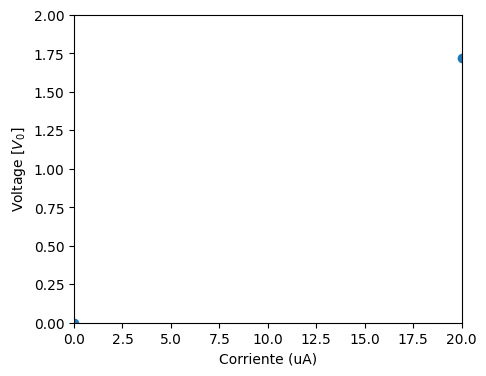

In [ ]:

import csv
voltage_values=np.zeros(len(voltages))
print(voltage_values.shape)
for ii in range(len(voltages)):
	max_idx=voltages[ii].shape[0]-1
	voltage_values[ii]=np.mean(voltages[ii][max_idx])
	data_series=np.vstack((times[ii],voltages[ii]))

	np.save(f'series/output_{ii}.npy', data_series)

plt.scatter(currents,voltage_values)
plt.xlabel("Corriente (uA)")
plt.ylabel("Voltage [$V_0$]")
# plt.plot(times[1],voltages[1])
# plt.ylim(3.66,3.673)
plt.xlim(0,20)
plt.ylim(0,2)

In [ ]:
fig, ax = zero_current_solution.plot_currents(min_stream_amp=0.075, vmin=0, vmax=300)

In [ ]:
fig, axes = zero_current_solution.dynamics.plot(tmin=10, mean_voltage=False)

In [ ]:
zero_current_solution.dynamics.mean_voltage(tmin=200)

In [ ]:
if MAKE_ANIMATIONS:
    field_current_video = make_video_from_solution(
        solutions[1],
        quantities=["order_parameter", "phase"],
        figsize=(8, 4),
        vmax_a=[1,1],
        vmin_a=[0,-1],
        cmap_b=["gist_rainbow", "hsv"],
    )
    display(field_current_video,)